# Analyzing Changes in Fandango's Movie Rating System

In this project, we analyze movie ratings data from Fandango to explore whether there were any significant changes in the rating system following Walt Hickey's 2015 analysis. Hickey’s investigation suggested that Fandango’s ratings were artificially inflated, sparking public interest and scrutiny.

Our goal is to compare movie ratings before and after the publication of Hickey’s article to determine if Fandango made any adjustments to its rating practices. By examining datasets from different time periods, we aim to uncover potential patterns or shifts in the way ratings were presented to users.

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

In [77]:
fandango_previous = pd.read_csv('fandango_score_comparison.csv')
fandango_after = pd.read_csv('movie_ratings_16_17.csv')

In [78]:
previous = fandango_previous[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
after = fandango_after[['movie', 'year', 'fandango']]

In [79]:
previous.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [80]:
after.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


## Project Goal and Scope

Our initial goal was to determine whether there was any change in Fandango's movie rating system following Walt Hickey's 2015 analysis, which accused the platform of inflating ratings. The population of interest for this investigation includes all movie ratings on Fandango, regardless of release year.

To evaluate potential changes in the rating system, we planned to compare two samples from different time periods — one before and one after the article's publication. However, after reviewing the sampling methods used to collect the data, we discovered limitations that affected how representative the samples were.

### Sampling Limitations

According to Hickey's article and the dataset's README:

- The first sample includes movies that had at least 30 fan ratings on Fandango and were available for ticket purchase in 2015.
- The sampling was not random and was likely influenced by temporal trends.

The second sample, collected independently, includes:

- Movies released in 2016 or later.
- Movies with a substantial (though unspecified) number of votes and reviews.

Both samples were obtained through purposive sampling, meaning they were selected based on specific criteria relevant to the original researchers' goals. As a result, they are not necessarily representative of all Fandango ratings and could introduce significant sampling bias.

### Updated Goal

Given the sampling constraints, we've revised our goal. Rather than attempting to generalize about the entire Fandango rating system, we now aim to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and 2016. While narrower in scope, this adjusted objective serves as a reasonable proxy for our original research question.


In [ ]:
previous.loc[:, 'Year'] = previous['FILM'].str[-5:-1]

In [82]:
previous['Year'].value_counts()

Year
2015    129
2014     17
Name: count, dtype: int64

In [83]:
fandango_2015 = previous[previous['Year'] == '2015']

In [84]:
after['year'].value_counts()

year
2016    191
2017     23
Name: count, dtype: int64

In [85]:
fandango_2016 = after[after['year'] == 2016]

In [86]:
fandango_2015.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [87]:
fandango_2016.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0


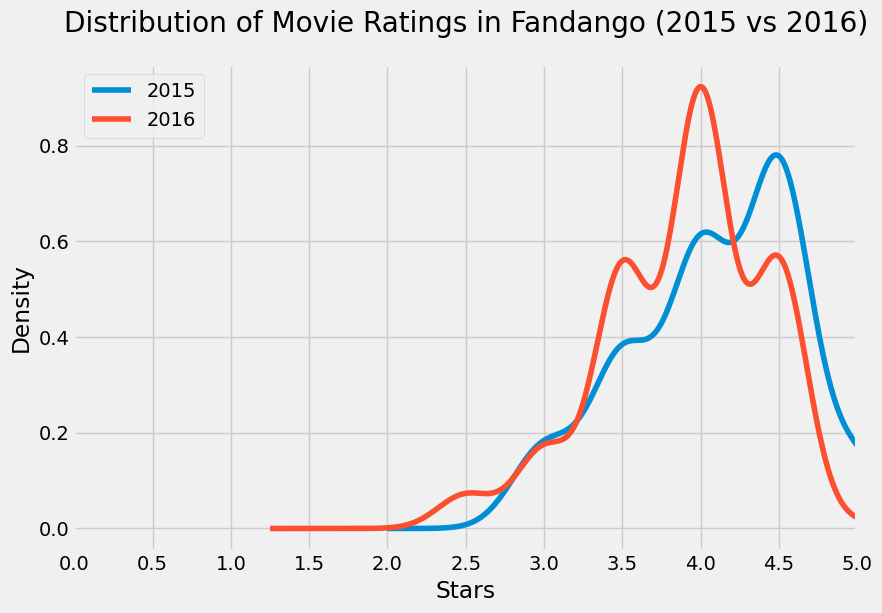

In [88]:
plt.style.use('fivethirtyeight')

plt.xlabel('Stars')
plt.ylabel('Density')
plt.title('Distribution of Movie Ratings in Fandango (2015 vs 2016)', y=1.05)

plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.xlim(0, 5)

fandango_2015['Fandango_Stars'].plot.kde(label='2015', legend=True, figsize = (9, 6))
fandango_2016['fandango'].plot.kde(label='2016', legend=True)
plt.legend(loc='upper left')
plt.show()

### Analysis of Fandango Movie Ratings Distribution (2015 vs 2016)

**What is the shape of each distribution?**

* **2015 Distribution:** The distribution is strongly left-skewed, meaning the tail extends towards the lower ratings (left side) and most ratings are concentrated on the higher end. It appears to be multimodal, with noticeable peaks around 4.0 and a dominant peak around 4.5 stars. There might be a smaller bump around 3.5 stars as well.
* **2016 Distribution:** This distribution is also left-skewed, similar to the 2015 data. It is also multimodal, with prominent peaks around 3.5 and 4.0 stars, and perhaps a smaller one near 4.5 stars. The highest peak for 2016 is clearly around 4.0 stars.

**How do their shapes compare?**

* Both distributions share a similar overall shape: they are both left-skewed and multimodal. This indicates that for both years, Fandango ratings tended to be clustered at the higher end of the scale (4-5 stars), with fewer movies receiving lower ratings.

**If their shapes are similar, is there anything that clearly differentiates them?**

* Despite the similar general shape, there's a clear difference in the location and prominence of the peaks and the overall position of the distributions.
* The 2015 distribution is shifted more towards the right (higher ratings) compared to the 2016 distribution.
* The most prominent peak (mode) in 2015 is higher (around 4.5 stars) than the most prominent peak in 2016 (around 4.0 stars).
* The 2016 distribution shows slightly more density in the 3.0 to 4.0 star range compared to 2015.

**Can we see any evidence on the graph that suggests that there is indeed a change between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016?**

* The difference in the position and peak locations of the two curves provides clear visual evidence that the distribution of ratings changed between 2015 and 2016. The two density plots are distinct and do not overlap perfectly.

**Provided there's a difference, can we tell anything about the direction of the difference? In other words, were movies in 2016 rated lower or higher compared to 2015?**

* We can determine the direction of the difference. The 2016 distribution (orange line) is noticeably shifted to the left compared to the 2015 distribution (blue line).
* This leftward shift indicates that, on average, popular movies reviewed on Fandango in 2016 were rated lower than popular movies reviewed in 2015. The concentration of ratings moved from predominantly around 4.5 stars in 2015 to being more centered around 4.0 stars in 2016.

#### Frequency Distribution Comparison of Fandango (2015) and Fandango (2016)

In [91]:
fandango_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 10

Fandango_Stars
3.0    0.852713
3.5    1.782946
4.0    2.868217
4.5    3.798450
5.0    0.697674
Name: proportion, dtype: float64

In [92]:
fandango_2016['fandango'].value_counts(normalize = True).sort_index() * 100

fandango
2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: proportion, dtype: float64

#### Absolute Frequencies: Is it Useful to Compare?

The two samples represent different numbers of movies, and using absolute frequencies** may not make sense when comparing these two distributions. Since the number of movies in each sample is different, absolute frequencies alone will not provide a fair comparison.

#### Relative Frequencies: Proportions or Percentages?

Since absolute frequencies might be misleading, relative frequencies would be a better measure. Proportions and percentages are two ways to express relative frequencies.

- Proportions are the fractional representation (values between 0 and 1).
- Percentages are the same values but multiplied by 100, making them more readable.

For better readability, percentages would likely be preferred, as they are more intuitive to understand.

#### Is There a Clear Difference Between the Two Distributions?

Looking at the two tables, we can observe a few key differences:

- Fandango 2015 shows a higher proportion of ratings in the 4.0 and 4.5 ranges, suggesting that the reviews are more positive overall in 2015.
- Fandango 2016 has a more balanced distribution, with a larger proportion of ratings in the 3.5 4.0 and 4.5 categories, but also a noticeable 3.0 rating, which was less common in 2015. This indicates that the ratings in 2016 are more spread out.

#### What Can You Tell About the Direction of the Difference?

From the proportions in the tables, we can infer the direction of the difference between the two distributions:

- In 2015 the ratings are skewed towards the higher end especially with the large proportion in the 4.5 category.
- In 2016 there is a more even distribution with significant proportions across both lower and higher ratings, although still showing a peak in the 4.0 and 4.5 ratings.

The direction of the difference, which suggests that Fandango's ratings were generally higher in 2015, seems to be clearer from the 2015 table. However, 2016 ratings are more spread out, so the direction of the difference is less stark than before.

---

#### Conclusion

In conclusion, comparing the two distributions using relative frequencies (percentages) gives a clearer view of the differences between Fandango's ratings in 2015 and 2016. While the two distributions still show differences, the data from 2016 suggests a more varied set of ratings, making the comparison a bit less clear than in 2015.

### Direction of the Change

In [93]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

mode_2015 = fandango_2015['Fandango_Stars'].mode()[0] 
mode_2016 = fandango_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


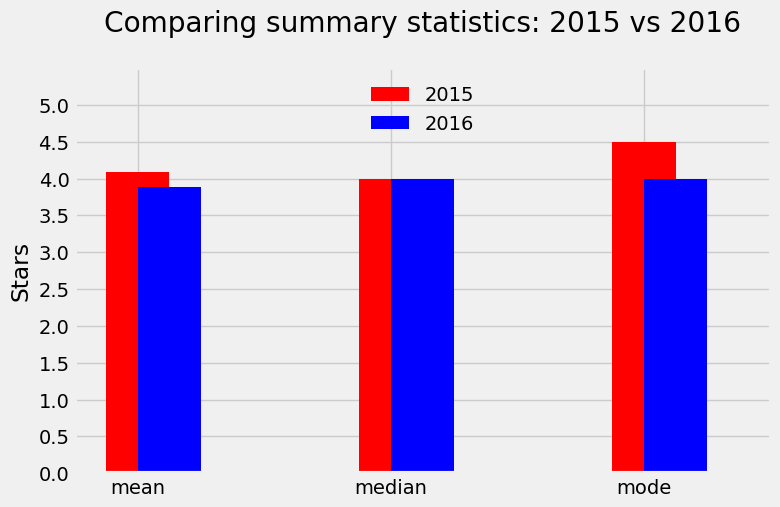

In [98]:
import numpy as np
import seaborn as sns

plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = 'red', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = 'blue', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(np.arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

In [104]:
mean_diff = (summary.loc['mean'].iloc[0] - summary.loc['mean'].iloc[1]) / summary.loc['mean'].iloc[0]
print(mean_diff)

0.04842683568951993


### Conclusion

Based on the comparison of summary statistics (mean, median, mode) for Fandango movie ratings in 2015 and 2016:

* The mean rating shows a slight decrease in 2016 compared to 2015.
* The median rating remained constant at 4.0 stars for both years.
* The mode (most frequent rating) experienced a significant drop from 4.5 stars in 2015 to 4.0 stars in 2016.

These statistics collectively suggest that popular movies featured on Fandango tended to receive lower ratings in 2016 than in 2015. The decrease in the mode is particularly indicative of this shift, corroborating the findings from the kernel density plot analysis.